## load img data

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import pandas as pd
data_df = pd.read_csv('../outputs/target_idx.csv')
data_df.head()

,Image Index,Emphysema
0,00000009_000.png,1
1,00000013_041.png,1
2,00000013_042.png,1
3,00000027_000.png,1
4,00000034_000.png,1


In [3]:
datagen=ImageDataGenerator(rescale=1./255., validation_split=0.1)

img_dir = "../inputs/images/"

train_generator=datagen.flow_from_dataframe(
                            dataframe=data_df,
                            directory=img_dir,
                            x_col="Image Index",
                            y_col="Emphysema",
                            has_ext=True,                                      
                            subset="training",
                            batch_size=32,
                            seed=1,
                            shuffle=True,
                            color_mode = 'rgb',
                            class_mode="binary",
                            target_size=(512, 512))

valid_generator=datagen.flow_from_dataframe(
                            dataframe=data_df,
                            directory=img_dir,
                            x_col="Image Index",
                            y_col="Emphysema",
                            has_ext=True,                                      
                            subset="validation",
                            batch_size=32,
                            seed=1,
                            shuffle=True,
                            color_mode = 'rgb',
                            class_mode="binary",
                            target_size=(512, 512))

Found 1669 images belonging to 2 classes.
Found 223 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(512, 512, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])  

In [6]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=10)

Epoch 1/10
52/52 [==============================] - 224s 4s/step - loss: 1.0501 - acc: 0.5066 - val_loss: 0.6909 - val_acc: 0.5208
Epoch 2/10
52/52 [==============================] - 203s 4s/step - loss: 0.6878 - acc: 0.5568 - val_loss: 0.6904 - val_acc: 0.5079
Epoch 3/10
52/52 [==============================] - 203s 4s/step - loss: 0.6900 - acc: 0.5702 - val_loss: 0.7084 - val_acc: 0.4974
Epoch 4/10
52/52 [==============================] - 203s 4s/step - loss: 0.6375 - acc: 0.6249 - val_loss: 0.7138 - val_acc: 0.5497
Epoch 5/10
52/52 [==============================] - 202s 4s/step - loss: 0.6069 - acc: 0.6432 - val_loss: 0.7297 - val_acc: 0.5393
Epoch 6/10
52/52 [==============================] - 203s 4s/step - loss: 0.5253 - acc: 0.7217 - val_loss: 0.9011 - val_acc: 0.5236
Epoch 7/10
52/52 [==============================] - 202s 4s/step - loss: 0.4542 - acc: 0.7740 - val_loss: 0.8941 - val_acc: 0.5445
Epoch 8/10
52/52 [==============================] - 204s 4s/step - loss: 0.3641 - a

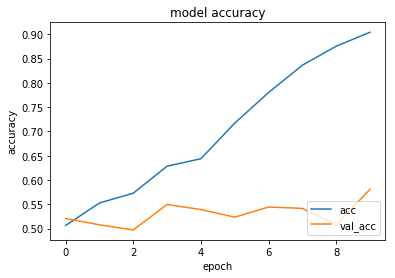

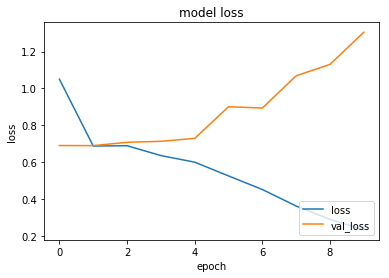

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    # print(history.history.keys())

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

plot_history(history)

In [9]:
import numpy as np
np.savez('../plots/LeNet_train', acc=history.history['acc'], loss=history.history['loss'])
np.savez('../plots/LeNet_valid', acc=history.history['val_acc'], loss=history.history['val_loss'])